# Introduction to Regression Project

## 1. Import the necessary libraries and load the data

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

users = pd.read_csv("https://bit.ly/UsersBehaviourTelco")


## 2. Data cleaning and Preparation:
a. View first few records
b. Check the shape of data
c. Check for and deal with missing values
d. Check for and deal with duplicates

In [12]:
# Read first ten records of the data

users.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [13]:
# Check the shape of the data

users.shape

(3214, 5)

In [14]:
# Check for missing values

users.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

No missing values

In [15]:
# Check for duplicates

users.duplicated().sum()

0

No duplicates

## 3. Splitting the data into training, validation and test sets

In [16]:
# Spliting the data into training, validation and test sets (ratio 60:20:20 used)
# First split into 2, training and remainder

features = users.drop(['is_ultra'], axis=1)
target = users['is_ultra']

features_train, features_remainder, target_train, target_remainder = train_test_split(
    features, target, test_size=0.4, random_state=12345
)

# Proceed to split the remainder into validation and test sets

features_valid, features_test, target_valid, target_test = train_test_split(
    features_remainder, target_remainder, test_size=0.5, random_state=12345
)

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(1928, 4)
(643, 4)
(643, 4)
(1928,)
(643,)
(643,)


## 4. Testing the various models to find most ideal:


In [17]:
# Test the Decision tree model

for depth in range(1, 16, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model.fit(features_train, target_train)
    predicted_train = model.predict(features_train)
    predicted_valid = model.predict(features_valid)
    predicted_test = model.predict(features_test)
    print('Accuracy at depth',depth,': Training Set:', accuracy_score(target_train, predicted_train),', Validation Set:', accuracy_score(target_valid, predicted_valid),', Test Set:', accuracy_score(target_test, predicted_test))


Accuracy at depth 1 : Training Set: 0.7577800829875518 , Validation Set: 0.7542768273716952 , Test Set: 0.7356143079315708
Accuracy at depth 2 : Training Set: 0.7878630705394191 , Validation Set: 0.7822706065318819 , Test Set: 0.7744945567651633
Accuracy at depth 3 : Training Set: 0.8075726141078838 , Validation Set: 0.7853810264385692 , Test Set: 0.7791601866251944
Accuracy at depth 4 : Training Set: 0.8106846473029046 , Validation Set: 0.7791601866251944 , Test Set: 0.7744945567651633
Accuracy at depth 5 : Training Set: 0.8200207468879668 , Validation Set: 0.7791601866251944 , Test Set: 0.7838258164852255
Accuracy at depth 6 : Training Set: 0.8376556016597511 , Validation Set: 0.7838258164852255 , Test Set: 0.776049766718507
Accuracy at depth 7 : Training Set: 0.8558091286307054 , Validation Set: 0.7822706065318819 , Test Set: 0.7993779160186625
Accuracy at depth 8 : Training Set: 0.8625518672199171 , Validation Set: 0.7791601866251944 , Test Set: 0.7931570762052877
Accuracy at depth

Max_depth of 2 gives the best accuracy using test data, while also reducing overfittng. Accuracy is 0.774.

In [18]:
# Testing RandomForest

for depth in range(1, 16, 1):
  model = RandomForestClassifier(n_estimators=10, max_depth=depth, random_state=12345)
  model.fit(features_train, target_train)
  predicted_train = model.predict(features_train)
  predicted_valid = model.predict(features_valid)
  predicted_test = model.predict(features_test)
  print('Accuracy at depth',depth,': Training Set:', accuracy_score(target_train, predicted_train),', Validation Set:', accuracy_score(target_valid, predicted_valid),', Test Set:', accuracy_score(target_test, predicted_test))

    





Accuracy at depth 1 : Training Set: 0.7442946058091287 , Validation Set: 0.7558320373250389 , Test Set: 0.7402799377916018
Accuracy at depth 2 : Training Set: 0.7785269709543569 , Validation Set: 0.7776049766718507 , Test Set: 0.776049766718507
Accuracy at depth 3 : Training Set: 0.8101659751037344 , Validation Set: 0.7853810264385692 , Test Set: 0.776049766718507
Accuracy at depth 4 : Training Set: 0.8143153526970954 , Validation Set: 0.7900466562986003 , Test Set: 0.7853810264385692
Accuracy at depth 5 : Training Set: 0.8241701244813278 , Validation Set: 0.7931570762052877 , Test Set: 0.7900466562986003
Accuracy at depth 6 : Training Set: 0.8350622406639004 , Validation Set: 0.8009331259720062 , Test Set: 0.7916018662519441
Accuracy at depth 7 : Training Set: 0.8552904564315352 , Validation Set: 0.7947122861586314 , Test Set: 0.8009331259720062
Accuracy at depth 8 : Training Set: 0.8698132780082988 , Validation Set: 0.7962674961119751 , Test Set: 0.807153965785381
Accuracy at depth 9

Using 10 trees with Max_depth of 2 gives an accuracy using test data almost equal to that of training and validation sets. Accuracy is 0.776.

In [19]:
# Testing the LogisticRegression model

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_train = model.predict(features_train)
predicted_valid = model.predict(features_valid)
predicted_test = model.predict(features_test)
print('Accuracy at depth',depth,': Training Set:', accuracy_score(target_train, predicted_train),', Validation Set:', accuracy_score(target_valid, predicted_valid),', Test Set:', accuracy_score(target_test, predicted_test))

Accuracy at depth 15 : Training Set: 0.7505186721991701 , Validation Set: 0.7589424572317263 , Test Set: 0.7402799377916018


The LinearRegression model gives an accuracy of less than 0.75 when tested using the test data set.

Comparing all 3 models: 
Decision Tree: 0.774
Random Forest: 0.776
Linear Regression: 0.740

Therefore the best model for this case is the Random Forest.

## 5. Sanity Check

0    0.861586
1    0.138414
dtype: float64


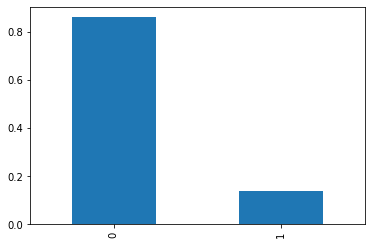

In [20]:
# Sanity Check

model = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=12345)
model.fit(features_train, target_train)
predicted_test = pd.Series(model.predict(features_test))

class_frequency = predicted_test.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');